# Step 1 -- List of S&P 500 companies

Retreive from https://en.wikipedia.org/wiki/List_of_S%26P_500_companies

output: 'sp500.csv'

In [1]:
# pip install wikipedia

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
                                              0.0/147.9 kB ? eta -:--:--
     -------------------------------------- 147.9/147.9 kB 9.2 MB/s eta 0:00:00
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11707 sha256=a244593afe0eafd35a09738abf33ad76b8ac49720c09311673dca39db11c7b50
  Stored in directory: c:\users\86069\appdata\local\pip\cache\wheels\8f\ab\cb\45ccc40522d3a1c41e1d2ad53b8f33a62f394011ec38cd71c6
Successfully built wikipedia
Note: you may need to restart the kernel to use updated packages.


In [1]:
from datetime import datetime
import os
import re
import shutil

import numpy as np
import pandas as pd
import wikipedia as wp
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'
# pd.set_option('display.max_rows', 10)

from tqdm import tqdm

import scipy.stats
from scipy.linalg import svd, diagsvd, block_diag
from numpy.linalg import inv
import numpy.linalg as la
from scipy.stats import norm

from collections import Counter

_DATA_DIR = './data/'

# -*- encoding: utf-8 -*-
%matplotlib inline

In [5]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [6]:
def get_table(title, filename, match, use_cache=False):

    if use_cache and os.path.isfile(filename):
        pass
    else:
        html = wp.page(title).html() # get the HTML text
        df = pd.read_html(html, header=0, match=match)[0] # read the HTML table

        df.to_csv(filename, header=True, index=False, encoding='utf-8') # save the table to a CSV file

    df = pd.read_csv(filename) # read the table from the CSV file
    return df

In [8]:
title = 'List of S&P 500 companies'
filename = _DATA_DIR+'sp500.csv'
sp500 = get_table(title, filename, match='Symbol')

# dd/mm/YY H:M:S
now = datetime.now()
dt_string = now.strftime("%m/%d/%Y %H:%M:%S")
print('{} (retrieved {})'.format(title, dt_string))
sp500

C:\Users\86069\AppData\Local\Temp\ipykernel_20796\2813210702.py:7: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(html, header=0, match=match)[0] # read the HTML table


List of S&P 500 companies (retrieved 05/10/2024 21:31:48)


Symbol            Security             GICS Sector  \
0      MMM                  3M             Industrials   
1      AOS         A. O. Smith             Industrials   
2      ABT              Abbott             Health Care   
3     ABBV              AbbVie             Health Care   
4      ACN           Accenture  Information Technology   
..     ...                 ...                     ...   
498    XYL          Xylem Inc.             Industrials   
499    YUM         Yum! Brands  Consumer Discretionary   
500   ZBRA  Zebra Technologies  Information Technology   
501    ZBH       Zimmer Biomet             Health Care   
502    ZTS              Zoetis             Health Care   

                                GICS Sub-Industry    Headquarters Location  \
0                        Industrial Conglomerates    Saint Paul, Minnesota   
1                               Building Products     Milwaukee, Wisconsin   
2                           Health Care Equipment  North Chicago, Illinois   
3                                   Biotechnology  North Chicago, Illinois   
4                  IT Consulting & Other Services          Dublin, Ireland   
..                                            ...                      ...   
498  Industrial Machinery & Supplies & Components   White Plains, New York   
499                                   Restaurants     Louisville, Kentucky   
500            Electronic Equipment & Instruments   Lincolnshire, Illinois   
501                         Health Care Equipment          Warsaw, Indiana   
502                               Pharmaceuticals   Parsippany, New Jersey   

     Date added      CIK      Founded  
0    1957-03-04    66740         1902  
1    2017-07-26    91142         1916  
2    1957-03-04     1800         1888  
3    2012-12-31  1551152  2013 (1888)  
4    2011-07-06  1467373         1989  
..          ...      ...          ...  
498  2011-11-01  1524472         2011  
499  1997-10-06  1041061         1997  
500  2019-12-23   877212         1969  
501  2001-08-07  1136869         1927  
502  2013-06-21  1555280         1952  

[503 rows x 8 columns]

In [9]:
sp500['Symbol'].tolist()

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BK',
 'BBWI',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'BLDR',
 'BG',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CHRW',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA'

In [10]:

with open(_DATA_DIR+'sp500_ticker_list.txt', 'w') as f:
    for text in sp500['Symbol'].tolist():
        f.write(text + '\n')


# Step 2 -- clean the data to get the input data matrix for R

In [11]:
df_SP500 = pd.read_csv(_DATA_DIR+'compustat_data.csv')
df_SP500

gvkey iid    datadate    tic    trfm    trt1m  ggroup    gind  \
0         1045  01  1995-01-31  AAMRQ  1.2935   5.3991    2030  203020   
1         1045  01  1995-02-28  AAMRQ  1.2935   8.9087    2030  203020   
2         1045  01  1995-03-31  AAMRQ  1.2935   5.9305    2030  203020   
3         1045  01  1995-04-30  AAMRQ  1.2935   4.0541    2030  203020   
4         1045  01  1995-05-31  AAMRQ  1.2935   0.9276    2030  203020   
...        ...  ..         ...    ...     ...      ...     ...     ...   
164704  316056  01  2023-11-30   ALLE  1.1053   7.8589    2010  201020   
164705  316056  01  2023-12-31   ALLE  1.1092  19.8416    2010  201020   
164706  316056  01  2024-01-31   ALLE  1.1092  -2.2101    2010  201020   
164707  316056  01  2024-02-29   ALLE  1.1092   3.2125    2010  201020   
164708  316056  01  2024-03-31   ALLE  1.1132   5.7246    2010  201020   

        gsector   gsubind  
0            20  20302010  
1            20  20302010  
2            20  20302010  
3            20  20302010  
4            20  20302010  
...         ...       ...  
164704       20  20102010  
164705       20  20102010  
164706       20  20102010  
164707       20  20102010  
164708       20  20102010  

[164709 rows x 10 columns]

In [13]:
df_SP500_crsp = pd.read_csv(_DATA_DIR+'wrds_crsp_data.csv')
df_SP500_crsp

PERMNO        date TICKER        RET
0        10057  1995-01-31    AMT   0.499524
1        10057  1995-02-28    AMT  -0.072000
2        10057  1995-03-31    AMT   0.103448
3        10057  1995-04-28    AMT   0.296875
4        10057  1995-05-31    AMT   0.132289
...        ...         ...    ...        ...
170834   93436  2023-11-30   TSLA   0.195379
170835   93436  2023-12-29   TSLA   0.034988
170836   93436  2024-01-31   TSLA  -0.246257
170837   93436  2024-02-29   TSLA   0.077901
170838   93436  2024-03-28   TSLA  -0.129235

[170839 rows x 4 columns]

In [24]:
# check the monthly return data are equal between the two data sources: compustat and crsp
np.max( np.abs( df_SP500[df_SP500['tic'] == 'AAPL']['trt1m'].values - 100*pd.to_numeric( df_SP500_crsp[df_SP500_crsp['TICKER'] == 'AAPL']['RET'].values ) ) )

0.003799999999991144

## Compstat data w/ GICS code

WRDS_CRSP_data.csv is from WRDS website, the details are in the Word file

In [82]:
df_SP500 = pd.read_csv(_DATA_DIR+'compustat_data.csv')

In [83]:
df_SP500

gvkey iid    datadate    tic    trfm    trt1m  ggroup    gind  \
0         1045  01  1995-01-31  AAMRQ  1.2935   5.3991    2030  203020   
1         1045  01  1995-02-28  AAMRQ  1.2935   8.9087    2030  203020   
2         1045  01  1995-03-31  AAMRQ  1.2935   5.9305    2030  203020   
3         1045  01  1995-04-30  AAMRQ  1.2935   4.0541    2030  203020   
4         1045  01  1995-05-31  AAMRQ  1.2935   0.9276    2030  203020   
...        ...  ..         ...    ...     ...      ...     ...     ...   
164704  316056  01  2023-11-30   ALLE  1.1053   7.8589    2010  201020   
164705  316056  01  2023-12-31   ALLE  1.1092  19.8416    2010  201020   
164706  316056  01  2024-01-31   ALLE  1.1092  -2.2101    2010  201020   
164707  316056  01  2024-02-29   ALLE  1.1092   3.2125    2010  201020   
164708  316056  01  2024-03-31   ALLE  1.1132   5.7246    2010  201020   

        gsector   gsubind  
0            20  20302010  
1            20  20302010  
2            20  20302010  
3            20  20302010  
4            20  20302010  
...         ...       ...  
164704       20  20102010  
164705       20  20102010  
164706       20  20102010  
164707       20  20102010  
164708       20  20102010  

[164709 rows x 10 columns]

In [84]:
# delete the 'gvkey' , 'iid' column
df_SP500 = df_SP500.drop(columns=['gvkey', 'iid', 'trfm'] + ['ggroup','gind','gsubind'])
# rename the 'trt1m' as 'RET', 'tic' as 'TICKER'
df_SP500 = df_SP500.rename(columns={'trt1m': 'RET', 'tic': 'ticker', 'datadate': 'date', 'gsector':'gics'})
df_SP500

date ticker      RET  gics
0       1995-01-31  AAMRQ   5.3991    20
1       1995-02-28  AAMRQ   8.9087    20
2       1995-03-31  AAMRQ   5.9305    20
3       1995-04-30  AAMRQ   4.0541    20
4       1995-05-31  AAMRQ   0.9276    20
...            ...    ...      ...   ...
164704  2023-11-30   ALLE   7.8589    20
164705  2023-12-31   ALLE  19.8416    20
164706  2024-01-31   ALLE  -2.2101    20
164707  2024-02-29   ALLE   3.2125    20
164708  2024-03-31   ALLE   5.7246    20

[164709 rows x 4 columns]

In [85]:
print(sum(df_SP500['RET'].isnull()))

2836


In [86]:
# 按照 'PERMNO' 和 "date" 双重index整理 df_SP500
df_SP500['date'] = pd.to_datetime(df_SP500['date'])
df_SP500 = df_SP500.set_index(['ticker', 'date'])
df_SP500

RET  gics
ticker date                     
AAMRQ  1995-01-31   5.3991    20
       1995-02-28   8.9087    20
       1995-03-31   5.9305    20
       1995-04-30   4.0541    20
       1995-05-31   0.9276    20
...                    ...   ...
ALLE   2023-11-30   7.8589    20
       2023-12-31  19.8416    20
       2024-01-31  -2.2101    20
       2024-02-29   3.2125    20
       2024-03-31   5.7246    20

[164709 rows x 2 columns]

In [87]:
# check 每个ticker对应的sector column是否只有一个unique的值
sum( df_SP500.groupby('ticker')['gics'].nunique() != 1 )

0

In [89]:
#建立一个字典, key是ticker, value是sector
ticker2gics_dict = df_SP500.groupby('ticker')['gics'].first().to_dict()
#查看sector_dict有多少个不同的values
print( len(set(ticker2gics_dict.values())) )
#查看sector_dict的每个values出现了多少次
gics2sector_dict = {
    '10': 'Energy',
    '15': 'Materials',
    '20': 'Industrials',
    '25': 'Consumer Discretionary',
    '30': 'Consumer Staples',
    '35': 'Health Care',
    '40': 'Financials',
    '45': 'Information Technology',
    '50': 'Communication Services',
    '55': 'Utilities',
    '60': 'Real Estate'
}
gics2sector_dict = {int(k): v for k, v in gics2sector_dict.items()}
print('check two dict:')
print( set(gics2sector_dict.keys()) == set(ticker2gics_dict.values()) )

Counter(ticker2gics_dict.values())
# use the two dict: ticker2gics_dict and gics2sector_dict to construct a new dict, key is ticker, value is the sector name
ticker2sector_dict = {k: gics2sector_dict[v] for k, v in ticker2gics_dict.items()}
ticker2sector_dict


11
check two dict:
True


{'0051B': 'Financials',
 '1974B': 'Industrials',
 '2091B': 'Financials',
 '3555B': 'Real Estate',
 '3CCIKO': 'Real Estate',
 '3UALAQ': 'Industrials',
 '4741B': 'Consumer Staples',
 '4764B': 'Consumer Discretionary',
 '4910B': 'Consumer Discretionary',
 '5050B': 'Industrials',
 '5235B': 'Financials',
 '5236B': 'Financials',
 '5237B': 'Financials',
 '5238B': 'Financials',
 '5973B': 'Materials',
 '6525B': 'Consumer Staples',
 '9297B': 'Consumer Staples',
 '9384B': 'Real Estate',
 'A': 'Health Care',
 'AAL': 'Industrials',
 'AAMRQ': 'Industrials',
 'AAPL': 'Information Technology',
 'ABBV': 'Health Care',
 'ABNB': 'Consumer Discretionary',
 'ABT': 'Health Care',
 'ACE.PC': 'Financials',
 'ACGL': 'Financials',
 'ACN': 'Information Technology',
 'ADBE': 'Information Technology',
 'ADI': 'Information Technology',
 'ADM': 'Consumer Staples',
 'ADP': 'Industrials',
 'ADSK': 'Information Technology',
 'AEE': 'Utilities',
 'AEP': 'Utilities',
 'AEP.Z': 'Utilities',
 'AEPPL': 'Utilities',
 'AEPPZ'

In [90]:
# 把df_SP500['date']转换成 pandas 里面的 month 类型的index, 然后 df_SP500.set_index(['PERMNO', 'date'])
df_SP500['month'] = df_SP500.index.get_level_values('date').to_period('M')
df_SP500 = df_SP500.set_index('month', append=True)
df_SP500

RET  gics
ticker date       month                 
AAMRQ  1995-01-31 1995-01   5.3991    20
       1995-02-28 1995-02   8.9087    20
       1995-03-31 1995-03   5.9305    20
       1995-04-30 1995-04   4.0541    20
       1995-05-31 1995-05   0.9276    20
...                            ...   ...
ALLE   2023-11-30 2023-11   7.8589    20
       2023-12-31 2023-12  19.8416    20
       2024-01-31 2024-01  -2.2101    20
       2024-02-29 2024-02   3.2125    20
       2024-03-31 2024-03   5.7246    20

[164709 rows x 2 columns]

In [91]:
# 删除所有的NaN
df_SP500 = df_SP500.dropna()
df_SP500

RET  gics
ticker date       month                 
AAMRQ  1995-01-31 1995-01   5.3991    20
       1995-02-28 1995-02   8.9087    20
       1995-03-31 1995-03   5.9305    20
       1995-04-30 1995-04   4.0541    20
       1995-05-31 1995-05   0.9276    20
...                            ...   ...
ALLE   2023-11-30 2023-11   7.8589    20
       2023-12-31 2023-12  19.8416    20
       2024-01-31 2024-01  -2.2101    20
       2024-02-29 2024-02   3.2125    20
       2024-03-31 2024-03   5.7246    20

[161873 rows x 2 columns]

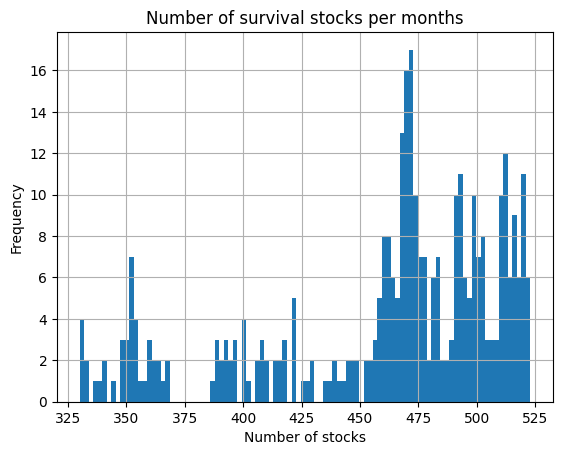

In [92]:
# 把每个月存活的股票总数计算出来, 并画一个histogram
df_SP500.index.get_level_values('month').value_counts().hist(bins=100)
plt.title('Number of survival stocks per months')
plt.xlabel('Number of stocks')
plt.ylabel('Frequency')
plt.show()

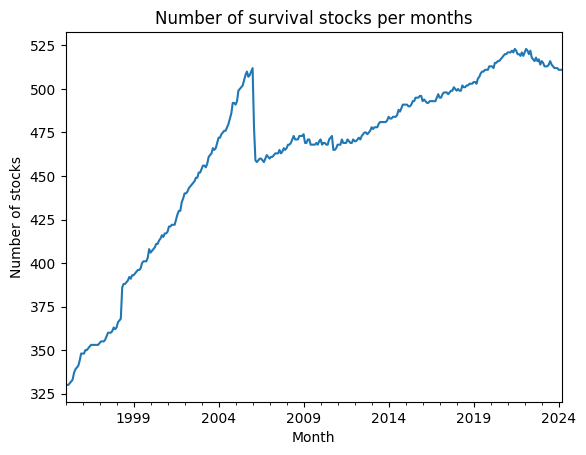

In [11]:
# 计算每个月的频率并排序
month_counts = df_SP500.index.get_level_values('month').value_counts().sort_index()

# 绘制图形
month_counts.plot(kind='line')

plt.title('Number of survival stocks per months')
plt.xlabel('Month')
plt.ylabel('Number of stocks')
plt.show()

In [12]:
month_counts

month
1995-01    330
1995-02    330
1995-03    330
1995-04    331
1995-05    332
          ... 
2023-11    512
2023-12    512
2024-01    511
2024-02    511
2024-03    511
Freq: M, Name: count, Length: 351, dtype: int64

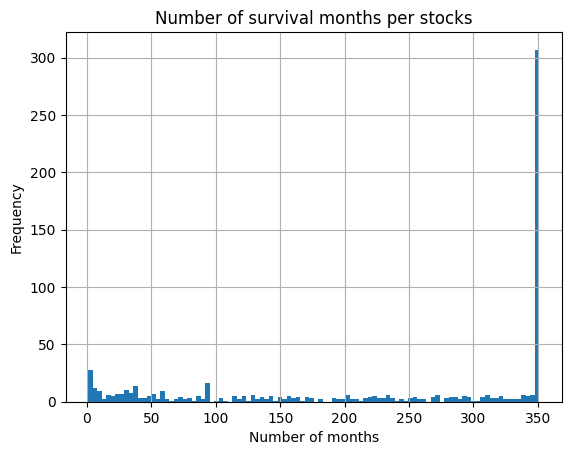

In [13]:
# 对df_SP500中PERMNO的每一个股票，计算其存在的月数
df_SP500.index.get_level_values('ticker').value_counts().hist(bins=100)
plt.title('Number of survival months per stocks')
plt.xlabel('Number of months')
plt.ylabel('Frequency')
plt.show()


## Fama-French 3 factors data

In [14]:
df_FF3 = pd.read_csv(_DATA_DIR+'F-F_Research_Data_Factors.csv', skiprows=3, index_col=0, parse_dates=True)
df_FF3

C:\Users\86069\AppData\Local\Temp\ipykernel_7908\1129623386.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_FF3 = pd.read_csv(_DATA_DIR+'F-F_Research_Data_Factors.csv', skiprows=3, index_col=0, parse_dates=True)


Mkt-RF   SMB   HML    RF
192607    2.96 -2.56 -2.43  0.22
192608    2.64 -1.17  3.82  0.25
192609    0.36 -1.40  0.13  0.23
192610   -3.24 -0.09  0.70  0.32
192611    2.53 -0.10 -0.51  0.31
...        ...   ...   ...   ...
202311    8.84 -0.02  1.64  0.44
202312    4.87  6.34  4.93  0.43
202401    0.71 -5.09 -2.38  0.47
202402    5.06 -0.24 -3.49  0.42
202403    2.83 -2.49  4.19  0.43

[1173 rows x 4 columns]

In [15]:
# 把index的数据类型转换成 month
df_FF3.index = pd.to_datetime(df_FF3.index.astype(str), format='%Y%m').to_period('M')
df_FF3.index.rename('month', inplace=True)
df_FF3

Mkt-RF   SMB   HML    RF
month                            
1926-07    2.96 -2.56 -2.43  0.22
1926-08    2.64 -1.17  3.82  0.25
1926-09    0.36 -1.40  0.13  0.23
1926-10   -3.24 -0.09  0.70  0.32
1926-11    2.53 -0.10 -0.51  0.31
...         ...   ...   ...   ...
2023-11    8.84 -0.02  1.64  0.44
2023-12    4.87  6.34  4.93  0.43
2024-01    0.71 -5.09 -2.38  0.47
2024-02    5.06 -0.24 -3.49  0.42
2024-03    2.83 -2.49  4.19  0.43

[1173 rows x 4 columns]

## de-riskfree-rate to get the final stock return panel data

In [108]:
# de-mean 之前 先统一化为100% 单位  Compustat data 不需要这一步
# df_SP500['RET'] = df_SP500['RET']*100

In [17]:
# 用 risk-free RF 来de-mean stock returns
# 将df_FF3_window的索引重置，以便可以进行合并, 合并df_SP500_window和df_FF3_reset
df_merged = pd.merge(df_SP500.reset_index(), df_FF3.reset_index(), on='month', how='left')

# 对df_merged的每一列（除了'PERMNO'和'month'）减去'Rf'列的值
df_merged['RET'] -= df_merged['RF']

# 将结果设置回原来的MultiIndex
df_merged.set_index(['ticker', 'month'], inplace=True)
# 只保留 RET 那一列
df_SP500 = df_merged[['RET']]
df_SP500

RET
ticker month           
AAMRQ  1995-01   4.9791
       1995-02   8.5087
       1995-03   5.4705
       1995-04   3.6141
       1995-05   0.3876
...                 ...
ALLE   2023-11   7.4189
       2023-12  19.4116
       2024-01  -2.6801
       2024-02   2.7925
       2024-03   5.2946

[161873 rows x 1 columns]

# Study 1: Factor test

In [18]:
# factor test function
TEST_SIZE = 12
def factor_test(Y_0, factors, C_thres = 1.0, test_size = TEST_SIZE):
    '''
    Perform the factor test for a given window of data.
    Y_0: the window of stock returns, each row is a stock, each column is a time point. N by TT matrix
    factors: the factor data, each column is a factor, each row is a time point.
    C_thres: the threshold for hard-thresholding the noise covariance matrix.
    '''
    N, TT = Y_0.shape[0], Y_0.shape[1] # number of time points
    Y = Y_0.values - Y_0.values.mean(axis=1).reshape(-1, 1).dot(np.ones((1, TT))) # de-mean the data
    res_svd = svd(Y, full_matrices=False)
    Sig_hat = np.diag(res_svd[1][:3]) / np.sqrt(TT)
    W_hat = res_svd[0][:, :3]
    V_hat = res_svd[2][:3, :].T # Transpose to match R's output

    B_hat = W_hat.dot(Sig_hat)
    F_hat = V_hat * np.sqrt(TT)
    # Estimate noise covariance matrix by hard-thresholding
    thres = C_thres * (1 / np.sqrt(N) + np.sqrt(np.log(N) / TT))
    Sig_u_pivot = Y.dot(Y.T) / TT - B_hat.dot(B_hat.T)
    Corr_u_pivot = np.diag(np.sqrt(1 / np.diag(Sig_u_pivot))).dot(Sig_u_pivot).dot(np.diag(np.sqrt(1 / np.diag(Sig_u_pivot))))
    idx = np.abs(Corr_u_pivot) > thres
    tmp = np.diag(np.ones(N))
    tmp[idx] = Corr_u_pivot[idx]
    Sig_u_hat = np.diag(np.sqrt(np.diag(Sig_u_pivot))).dot(tmp).dot(np.diag(np.sqrt(np.diag(Sig_u_pivot))))
    # factor test period
    t_set = np.arange(TT-test_size, TT) 
    V_pinv = inv(V_hat[t_set, :].T @ V_hat[t_set, :]) @ V_hat[t_set, :].T
    Q_V = inv(Sig_hat) @ W_hat.T @ Sig_u_hat @ W_hat @ inv(Sig_hat)
    test_stat = pd.DataFrame(index = [factors.index[-1]], columns=factors.columns)
    for col in factors.columns:
        v_set = factors[col].values[t_set]
        Test_D = v_set.T @ V_pinv.T @ Q_V @ V_pinv @ v_set
        Test_N = v_set.T @ v_set - v_set.T @ V_hat[t_set, :] @ V_pinv @ v_set
        test_stat[col] = Test_N / Test_D
    return test_stat

In [31]:

start_month = df_SP500.index.get_level_values('month').min()
end_month = df_SP500.index.get_level_values('month').max()

# 用于存储每个窗口的结果
WINDOW_SIZE = 60
RECORD_MOVE = 5 # move the record from the end of the window by this amount
factor_name_list = ['Mkt-RF', 'SMB', 'HML']
# restore all the results (mark the time point by the end of each window)
factor_test_stat_sum = pd.DataFrame(index= pd.period_range(start=start_month+WINDOW_SIZE-1 - RECORD_MOVE, end=end_month - RECORD_MOVE, freq='M'), columns=factor_name_list)

# 假设你知道循环的总迭代次数
total_iterations = (end_month - start_month).n - WINDOW_SIZE + 2 # since the last starting time is end_month - WINDOW_SIZE + 1
# 创建一个tqdm对象
progress_bar = tqdm(total=total_iterations)

# 循环提取每个窗口的数据
while start_month < end_month - WINDOW_SIZE + 2: # since the last starting time is end_month - WINDOW_SIZE + 1
    # 提取窗口
    df_SP500_window = df_SP500.loc[(df_SP500.index.get_level_values('month') >= start_month) & (df_SP500.index.get_level_values('month') < start_month + WINDOW_SIZE)]
    df_SP500_window = df_SP500_window.pivot_table(index='month', columns='ticker', values='RET')
    # 把window_matrix里""PERMNO" 有NaN值的行删除
    df_SP500_window = df_SP500_window.dropna(axis=1)

    df_FF3_window = df_FF3.loc[(df_FF3.index.get_level_values('month') >= start_month) & (df_FF3.index.get_level_values('month') < start_month + WINDOW_SIZE)]
    # apply the factor test here
    factors = df_FF3_window[factor_name_list]
    factor_test_stat_sum.loc[start_month + WINDOW_SIZE - 1 - RECORD_MOVE] = factor_test(df_SP500_window.T, factors, C_thres = 0.5).values
    # RESTORE the test statistics.
    # 将窗口的起始月份向前移动一月
    start_month += 1
    # 在每次迭代结束时更新进度条
    progress_bar.update(1)
# 关闭进度条
progress_bar.close()

100%|██████████| 292/292 [00:36<00:00,  8.11it/s]


### plot the test statistics !!!  use for paper

In [32]:
factor_test_stat_sum['Critical value']=scipy.stats.chi2.ppf(0.95, 12-3)
factor_test_stat_sum

Mkt-RF        SMB        HML  Critical value
1999-07   5.30318  12.316529   9.072233       16.918978
1999-08  2.585372  12.211601  12.337852       16.918978
1999-09  2.059397  20.370432  16.244937       16.918978
1999-10  1.382939  32.403134  10.547108       16.918978
1999-11  1.509892  13.761629   2.673346       16.918978
...           ...        ...        ...             ...
2023-06  4.481154   6.248055   3.288894       16.918978
2023-07  5.183351   9.431983   5.539159       16.918978
2023-08  5.074959  23.123153   3.579646       16.918978
2023-09  4.551855  24.751619   3.328393       16.918978
2023-10  1.487994  17.218758   4.390349       16.918978

[292 rows x 4 columns]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


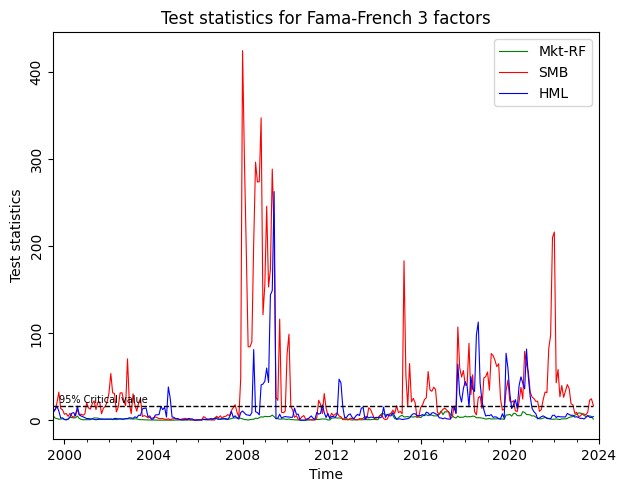

In [34]:
# Chi1
colors=['g','r','b']
df = factor_test_stat_sum
fig, ax = plt.subplots()
#fig=plt.figure()
for i in range(3):
  df[df.columns[i]].plot(c=colors[i],linewidth=0.8 )

plt.legend(df.columns[0:3])

df['Critical value'].plot( c='black', ls='dashed', linewidth=1 ) # this is the true 95% Critical value line plotting
start_month = df_SP500.index.get_level_values('month').min()
# 计算开始和结束的月份
start = start_month + WINDOW_SIZE - 1 - RECORD_MOVE
end = end_month - RECORD_MOVE

# 生成所有的月份标签
all_months = pd.period_range(start=start, end=end, freq='M')

# 每12个月选择一个标签
TIME_STEP = 48
TIME_START = 1 + RECORD_MOVE
selected_months = all_months[TIME_START::TIME_STEP]

# 创建一个与x轴刻度数量相同的标签列表
#option 1:
# labels = [''] * len(all_months)  # 先全部设为空字符串
# labels[1::TIME_STEP] = [str(month)[:4] for month in selected_months]  # 每12个月设置一个标签
#option 2:
labels = [str(month)[:4] for month in selected_months] + ['2024'] # 2024 is the last year

# plus 3 is just for the position o text "95% Critical value"
plt.text(start_month+WINDOW_SIZE-1 + 3- RECORD_MOVE, scipy.stats.chi2.ppf(0.95, 12-3)+3, "95% Critical value", fontsize = 7)

plt.title('Test statistics for Fama-French 3 factors')
plt.ylabel("Test statistics")
plt.xlabel("Time")

plt.yticks(rotation=90, va="center" )

# 设置x轴的刻度位置
#option 1:
#ax.set_xticks(df.index)
#option 2:
#ax.set_xticks(df.index[TIME_START::TIME_STEP])
ax.set_xticks(df.index[TIME_START::TIME_STEP].append(pd.Index([pd.Period('2024-01', 'M')])) ) # 2024 is the last year

# 设置x轴的标签
ax.set_xticklabels(labels)

zoom = 1.1
w, h = fig.get_size_inches()
fig.set_size_inches(w * zoom, h * zoom)

plt.savefig('FF_3f_factor_test.eps', format='eps',bbox_inches='tight') # we muse fo this before plt.show() , see https://stackoverflow.com/questions/9012487/savefig-outputs-blank-image

plt.show()

### plot factors and panel data in some windows

In [41]:
'RF' in df_SP500_window.columns

True

(60, 418)
(60, 327)


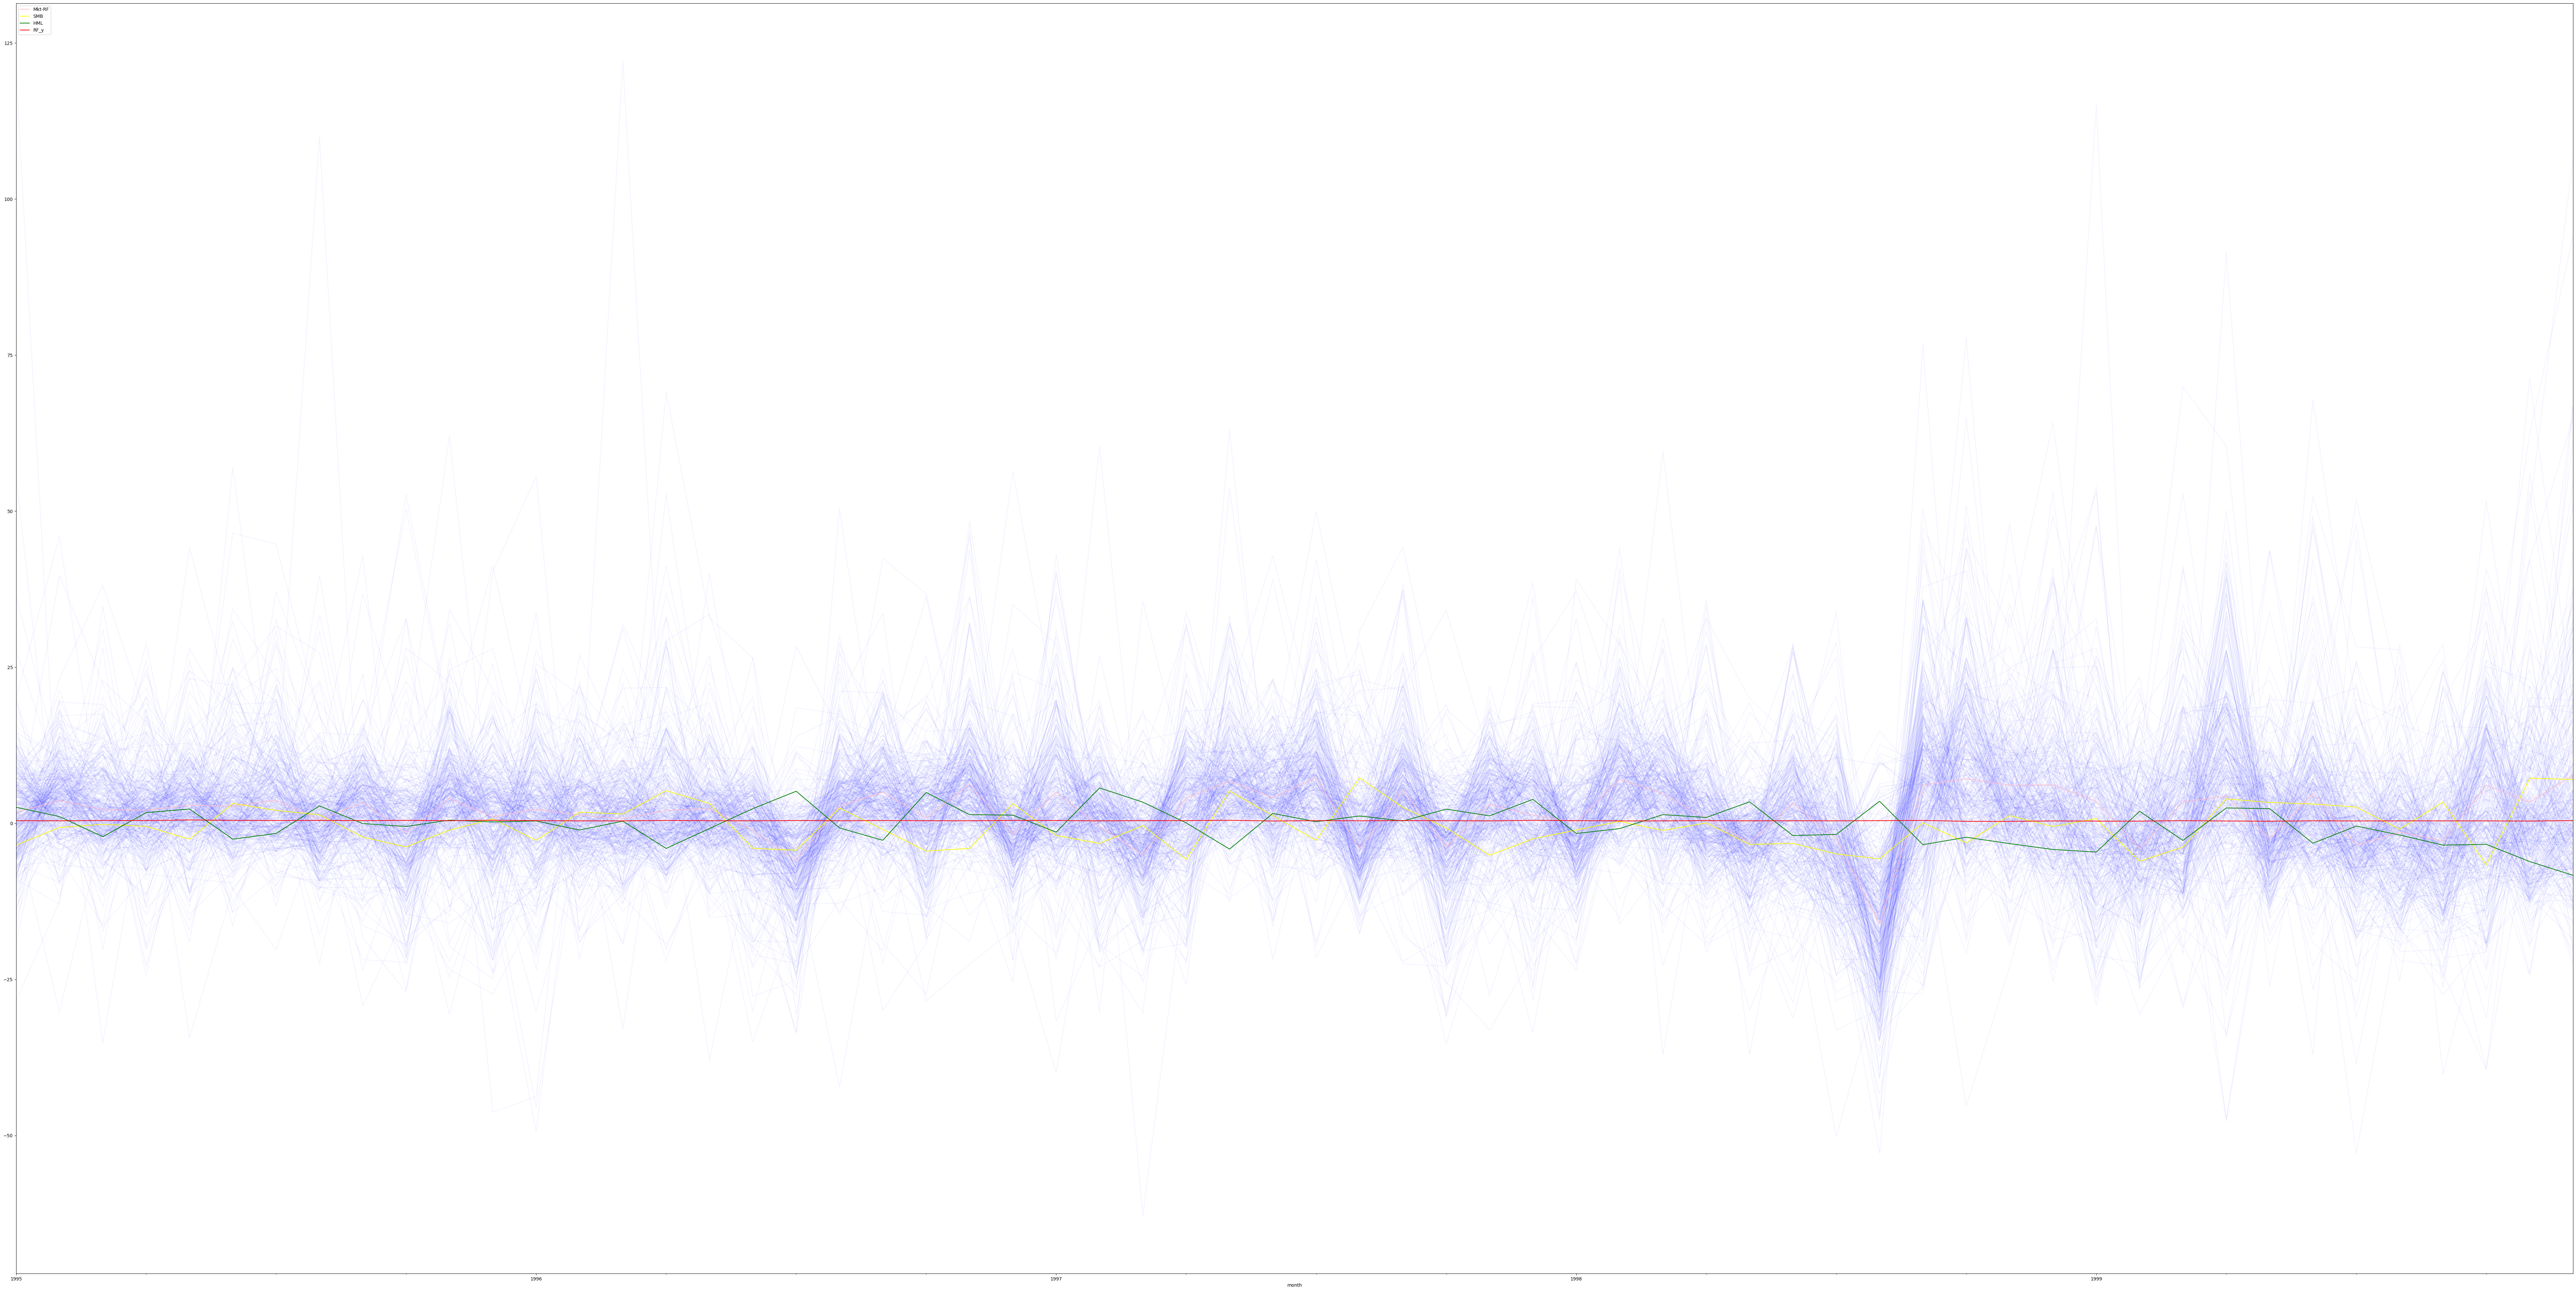

In [42]:
df_SP500_window = df_SP500.loc[(df_SP500.index.get_level_values('month') >= start_month) & (df_SP500.index.get_level_values('month') < start_month + WINDOW_SIZE)]
# df_SP500_window = df_SP500.loc[(df_SP500.index.get_level_values('month') >= start_month) & (df_SP500.index.get_level_values('month') < end_month )]
# 把window整理成一个data matrix, row index 是 PERMNO, column index 是 month, value 是 RET
df_SP500_window = df_SP500_window.pivot_table(index='month', columns='ticker', values='RET')
print(df_SP500_window.shape)
# 把window_matrix里""PERMNO" 有NaN值的行删除
df_SP500_window = df_SP500_window.dropna(axis=1)

df_FF3_window = df_FF3.loc[(df_FF3.index.get_level_values('month') >= start_month) & (df_FF3.index.get_level_values('month') < start_month + WINDOW_SIZE)]
# df_FF3_window = df_FF3.loc[(df_FF3.index.get_level_values('month') >= start_month) & (df_FF3.index.get_level_values('month') < end_month )]

print(df_SP500_window.shape)
# 把df_SP500_window里每个row的time series都同时plot在同一张图上, 把 df_FF3_window 里的前3列也画在同一张图上, 并用不同的颜色标记出来, 用legend
# df_SP500_window.plot(legend=False, color='blue', alpha=0.05)
# df_FF3_window[['Mkt-RF', 'SMB', 'HML']].plot(legend=True)
df_merge = pd.merge(df_SP500_window, df_FF3_window, on='month', how='left') 
# 只给 SMB 和HML 两列legend，其他列画图的时候不要legend
# plt.figure(figsize=(50, 10))  这个没用
columns_with_legend = ['Mkt-RF', 'SMB', 'HML', 'RF_y'] # since there is a ticker 'RF' in df_SP500_window, we need to use 'RF_y' instead of 'RF'
df_merge.plot(legend=False, color='blue', alpha=0.05, figsize=(100, 50))
# # 然后只为'column1'和'column2'添加图例
# for col in columns_with_legend:
#     df_merge[col].plot(label=col)

# plt.legend()
# # df_merge.drop(columns=).plot(legend=False, color='blue', alpha=0.05)
# #plt.legend(bbox_to_anchor=(1, 1))
# plt.show()
colors = ['pink', 'yellow', 'green', 'red']  # 指定颜色列表
lines = []  # 用于存储返回的Line2D对象
for col, color in zip(columns_with_legend, colors):
    line, = plt.plot(df_merge[col], label=col, color=color)  # 绘制线条，并保存Line2D对象
    lines.append(line)
# 创建图例，此时图例自动匹配颜色
legend = plt.legend(handles=lines, loc='upper left')

# # 手动调整图例颜色
# for line, text in zip(lines, legend.get_texts()):
#     # text.set_color(line.get_color())  # 设置图例文本的颜色与对应线条颜色相同
#     # 此处还可以设置字体大小等其他属性，例如：
#     text.set_fontsize(12)

plt.show()

### 之前用到的 start_month + pd.DateOffset(months=60) 报错是因为 这个是针对 pd.Timestamp object

In [25]:
import pandas as pd

# 创建一个Timestamp对象
timestamp = pd.Timestamp('2000-01-01')

# 使用pd.DateOffset向后移动60个月
new_timestamp = timestamp + pd.DateOffset(months=60)

print(new_timestamp)


2005-01-01 00:00:00


In [26]:
timestamp

Timestamp('2000-01-01 00:00:00')

In [13]:
month_index = df_SP500.index.get_level_values('month').to_Period(freq='M')
month_index_new = pd.PeriodIndex(month_index, freq='M')
# the above two lines are exactly same as the following line

# Study 2: structural break around financial crisis

https://www.nber.org/research/business-cycle-dating

In [124]:
recession_dates = [ (pd.Period('2001-03', 'M'), pd.Period('2001-11', 'M')), 
                    (pd.Period('2007-12', 'M'), pd.Period('2009-06', 'M')),
                    (pd.Period('2020-02', 'M'), pd.Period('2020-04', 'M')) ]

In [125]:
WINDOW_SIZE = 60
TEST_STAT_THRESHOLD = scipy.stats.chi2.ppf(0.95, 3)

def structural_beta_test(Y_0, C_thres=1.0, time_break = WINDOW_SIZE, test_stat_threshold = TEST_STAT_THRESHOLD):
    N, TT = Y_0.shape[0], Y_0.shape[1] # number of time points
    Y = Y_0.values - Y_0.values.mean(axis=1).reshape(-1, 1).dot(np.ones((1, TT))) # de-mean the data
    res_svd = svd(Y, full_matrices=False)
    Sig_hat = np.diag(res_svd[1][:3]) / np.sqrt(TT)
    W_hat = res_svd[0][:, :3]
    V_hat = res_svd[2][:3, :].T # Transpose to match R's output

    B_hat = W_hat.dot(Sig_hat)
    F_hat = V_hat * np.sqrt(TT)
    # Estimate noise covariance matrix by hard-thresholding
    thres = C_thres * (1 / np.sqrt(N) + np.sqrt(np.log(N) / TT))
    Sig_u_pivot = Y.dot(Y.T) / TT - B_hat.dot(B_hat.T)
    Corr_u_pivot = np.diag(np.sqrt(1 / np.diag(Sig_u_pivot))).dot(Sig_u_pivot).dot(np.diag(np.sqrt(1 / np.diag(Sig_u_pivot))))
    idx = np.abs(Corr_u_pivot) > thres
    tmp = np.diag(np.ones(N))
    tmp[idx] = Corr_u_pivot[idx]
    Sig_u_hat = np.diag(np.sqrt(np.diag(Sig_u_pivot))).dot(tmp).dot(np.diag(np.sqrt(np.diag(Sig_u_pivot))))
    # structural break test for beta
    t_set_1 = np.arange(0, time_break)
    t_set_2 = np.arange(time_break, TT)
    # (grouped) regression 1 and 2
    beta_1 = np.linalg.inv(F_hat[t_set_1, :].T @ F_hat[t_set_1, :]) @ F_hat[t_set_1, :].T @ Y[: , t_set_1].T  # r * n with n=N
    beta_2 = np.linalg.inv(F_hat[t_set_2, :].T @ F_hat[t_set_2, :]) @ F_hat[t_set_2, :].T @ Y[: , t_set_2].T  # r * n with n=N
    # covariance inverse
    # cov_inv_beta = 1/( (Sig_u_hat + W_hat@W_hat.T@Sig_u_hat + Sig_u_hat@W_hat@W_hat.T + W_hat@W_hat.T@Sig_u_hat@W_hat@W_hat.T )[index_beta, index_beta] ) \
    # * np.linalg.inv( np.linalg.inv(F_hat[t_set_1, :].T @ F_hat[t_set_1, :]) + np.linalg.inv(F_hat[t_set_2, :].T @ F_hat[t_set_2, :]) )
    cov_inv_beta = np.linalg.inv( np.linalg.inv(F_hat[t_set_1, :].T @ F_hat[t_set_1, :]) + np.linalg.inv(F_hat[t_set_2, :].T @ F_hat[t_set_2, :]) ) # r * r
    # test statistics
    test_stat = 1/( np.diag( Sig_u_hat + W_hat@W_hat.T@Sig_u_hat + Sig_u_hat@W_hat@W_hat.T + W_hat@W_hat.T@Sig_u_hat@W_hat@W_hat.T ) ) \
        * np.diag( (beta_1 - beta_2).T @ cov_inv_beta @ (beta_1 - beta_2) )  # n * r @ r * r @ r * n = n * n, then take diagonal
    

    test_True_False_results = test_stat > test_stat_threshold
    # test_results 是 df_merge.index 中每个ticker对应的test结果，请利用 ticker2sector_dict这个字典来统计每个sector中有百分之多少的ticker的test结果是True
    # 创建一个新的 DataFrame，其中包含每个 ticker 的 sector 和 test result
    df = pd.DataFrame({
        'sector': [ticker2sector_dict[ticker] for ticker in Y_0.index],
        'test_True_False_result': test_True_False_results 
    }, index=Y_0.index)

    # 计算每个 sector 中 test result 为 True 的 ticker 的百分比
    sector_change_proportion = df.groupby('sector')['test_True_False_result'].mean()
    
    return sector_change_proportion

def plot_structural_change_sector(sector_test_result):
    # 画一个图, 每一行是不同的sectors, 每一行有一个横着的bar的长度代表sector_test_result里的百分比，并在每一行的总长度上标上100%
    # 创建一个新的 figure 和 axes
    fig, ax = plt.subplots()

    # 创建一个水平条形图
    ax.barh(sector_test_result.index, sector_test_result.values)
    # 让每个bar的颜色都不一样
    for i, bar in enumerate(ax.patches):
        bar.set_color(plt.cm.viridis(i / len(sector_test_result.index)))

    # 设置 x 轴的范围为 0 到 1
    ax.set_xlim(0, 1)

    # 在每个条形的右侧添加标签
    for i, v in enumerate(sector_test_result.values):
        ax.text(v + 0.01, i, f'{v*100:.2f}%', color='blue', va='center')
        
    # 在 x 轴的最右侧添加标签
    # ax.text(1.01, len(sector_test_result.index)-1, '100%', color='red', va='center')

    # 显示图形
    plt.show()


2001-03 2001-11
shape of df_merge
(341, 120)


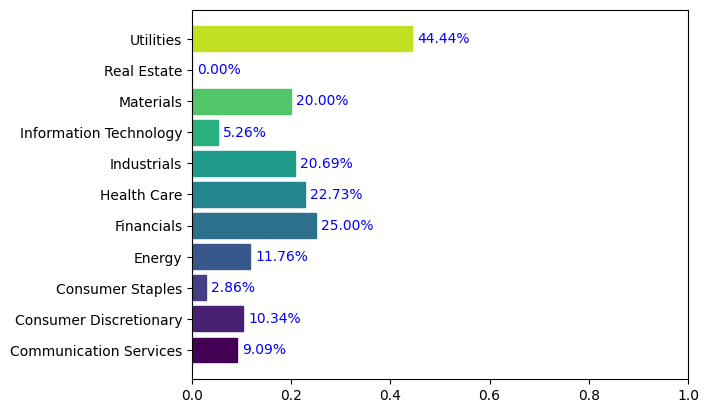

2007-12 2009-06
shape of df_merge
(394, 120)


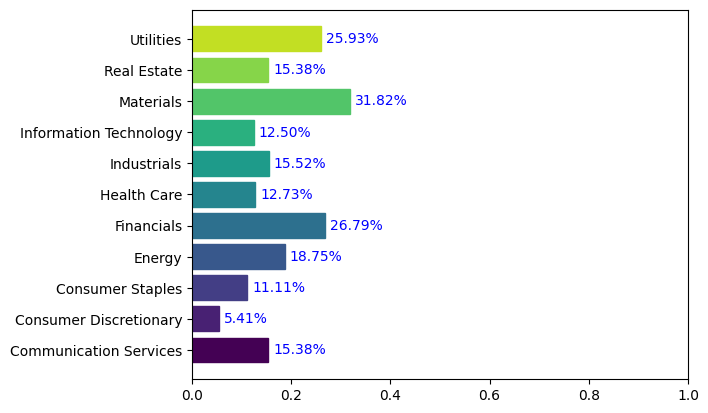

2020-02 2020-04
shape of df_merge
(481, 107)


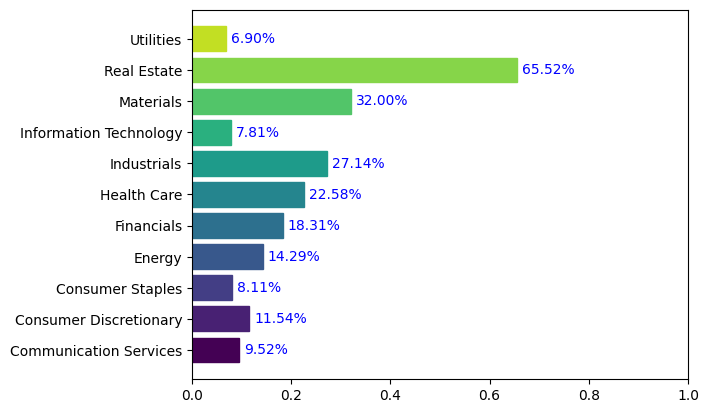

In [127]:
# do the three tests for three recessions
for start, end in recession_dates:
    print(start, end)
    # before recession period:
    df_SP500_left = df_SP500.loc[(df_SP500.index.get_level_values('month') >= start - WINDOW_SIZE) & (df_SP500.index.get_level_values('month') <= start - 1)]
    # after recession period:
    df_SP500_right = df_SP500.loc[(df_SP500.index.get_level_values('month') >= end + 1) & (df_SP500.index.get_level_values('month') <= end + WINDOW_SIZE)]

    tmp_left = df_SP500_left.pivot_table(index='month', columns='ticker', values='RET').T
    tmp_right = df_SP500_right.pivot_table(index='month', columns='ticker', values='RET').T
    df_merge = pd.merge(tmp_left, tmp_right, on='ticker', how='left') 
    df_merge = df_merge.dropna()
    print('shape of df_merge')
    print(df_merge.shape)
    # structural break test for beta
    sector_change_proportion = structural_beta_test(df_merge, time_break = WINDOW_SIZE)
    plot_structural_change_sector(sector_change_proportion)
    

# previous method to re-shape the data into a big matrix

In [ ]:
df_test = df_raw.groupby('PERMNO')['RET'].apply(lambda x: pd.Series(x.values))
print(len(df_raw['PERMNO'].unique()))
ct=0
for x in df_raw['PERMNO'].unique():
  if len(df_test[x])==12*(24):
    ct=ct+1
print(ct)

661
357


In [11]:
df_reshape=df_raw.groupby('PERMNO')['RET'].apply(lambda x: pd.Series(x.values)).unstack()
df_reshape

0         1         2         3         4         5         6    \
PERMNO                                                                         
10104   0.284058  0.009029 -0.291946  0.026066 -0.083141  0.496222  0.025253   
10107   0.261830 -0.142143  0.194005 -0.092748 -0.007686  0.117738 -0.048510   
10138   0.067518 -0.157265  0.118864  0.096364  0.024876 -0.003883 -0.087948   
10145  -0.119887  0.065256  0.188822  0.194409 -0.008809  0.085038  0.026786   
10401   0.198020 -0.095041 -0.024140 -0.050901  0.099010  0.009595 -0.066069   
...          ...       ...       ...       ...       ...       ...       ...   
93096        NaN       NaN -0.024783  0.047258  0.017029  0.056928  0.131485   
93132        NaN       NaN  0.034138 -0.019351 -0.002902  0.023283  0.011377   
93246        NaN       NaN  0.043187  0.077088 -0.271703  0.274795  0.054247   
93429        NaN       NaN -0.182796 -0.213910 -0.029173  0.188614 -0.009163   
93436        NaN       NaN -0.163240 -0.023069  0.047485  0.070326  0.617674   

             7         8         9    ...       291       292       293  \
PERMNO                                ...                                 
10104  -0.041051  0.246575  0.045330  ...  0.023676  0.118454  0.124127   
10107   0.078660 -0.021607  0.022084  ...  0.065765  0.070982  0.036999   
10138  -0.116071 -0.109899  0.293850  ... -0.005049 -0.046025  0.056738   
10145  -0.047614 -0.024415 -0.050052  ...  0.045626 -0.036079  0.082985   
10401  -0.136691 -0.028444  0.074713  ...       NaN       NaN       NaN   
...          ...       ...       ...  ...       ...       ...       ...   
93096   0.058103 -0.088654  0.059165  ...       NaN       NaN       NaN   
93132  -0.082115  0.007353  0.095499  ...       NaN       NaN       NaN   
93246  -0.179418  0.125413 -0.008065  ...       NaN       NaN       NaN   
93429  -0.034889  0.006562  0.285963  ...       NaN       NaN       NaN   
93436  -0.246250 -0.095006 -0.008714  ...       NaN       NaN       NaN   

             294       295       296       297       298       299       300  
PERMNO                                                                        
10104  -0.012260  0.026956 -0.120193 -0.020015  0.123888 -0.092763  0.063265  
10107  -0.013567 -0.022267 -0.036643  0.070815  0.122889 -0.007574  0.057281  
10138   0.100339 -0.089486 -0.054709 -0.137027  0.106409  0.087686  0.007057  
10145  -0.064434 -0.026580 -0.017027 -0.008011  0.074975  0.070386 -0.035525  
10401        NaN       NaN       NaN       NaN       NaN       NaN       NaN  
...          ...       ...       ...       ...       ...       ...       ...  
93096        NaN       NaN       NaN       NaN       NaN       NaN       NaN  
93132        NaN       NaN       NaN       NaN       NaN       NaN       NaN  
93246        NaN       NaN       NaN       NaN       NaN       NaN       NaN  
93429        NaN       NaN       NaN       NaN       NaN       NaN       NaN  
93436        NaN       NaN       NaN       NaN       NaN       NaN       NaN  

[663 rows x 301 columns]

In [ ]:
df_clr=df_reshape.dropna()
print( sum( df_clr.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all()) ) ) # check every column has only numeric values
df_clr

288


0         1         2         3         4         5         6    \
PERMNO                                                                         
10104   0.284058  0.009029 -0.291946  0.026066 -0.083141  0.496222  0.025253   
10107   0.261830 -0.142143  0.194005 -0.092748 -0.007686  0.117738 -0.048510   
10138   0.067518 -0.157265  0.118864  0.096364  0.024876 -0.003883 -0.087948   
10145  -0.119887  0.065256  0.188822  0.194409 -0.008809  0.085038  0.026786   
10516  -0.116788  0.003306 -0.028926  0.021277  0.003333  0.029167 -0.097166   
...          ...       ...       ...       ...       ...       ...       ...   
87717   0.092262  0.014986  0.159732  0.122685 -0.080825 -0.020225  0.139908   
88031  -0.151163 -0.095890 -0.106061  0.457627 -0.104651 -0.090909  0.228571   
88664  -0.228643 -0.059805  0.020833 -0.102041  0.072500  0.111504  0.101911   
91556   0.003175  0.158228 -0.040929  0.048502  0.000000  0.098014 -0.044665   
92655   0.039187  0.101955  0.067782  0.066508  0.038975  0.073955 -0.025948   

             7         8         9    ...       278       279       280  \
PERMNO                                ...                                 
10104  -0.041051  0.246575  0.045330  ...  0.088983 -0.108909 -0.020164   
10107   0.078660 -0.021607  0.022084  ...  0.031862 -0.099867 -0.018125   
10138  -0.116071 -0.109899  0.293850  ...  0.054164 -0.186190  0.032916   
10145  -0.047614 -0.024415 -0.050052  ...  0.025455 -0.005499  0.005633   
10516  -0.017040 -0.067308  0.010309  ...  0.150542 -0.007755  0.018535   
...          ...       ...       ...  ...       ...       ...       ...   
87717   0.040241 -0.006770  0.164557  ... -0.001935 -0.039647  0.105380   
88031  -0.104651  0.051948 -0.197531  ... -0.053318  0.072340  0.040149   
88664  -0.248555  0.139000 -0.015228  ...  0.117308 -0.037909 -0.005117   
91556  -0.135065 -0.031471  0.024845  ... -0.006784  0.102918 -0.147840   
92655  -0.003074 -0.199383  0.061617  ...  0.074705 -0.002785 -0.023144   

             281       282       283       284       285       286       287  
PERMNO                                                                        
10104  -0.028504  0.118649 -0.047405 -0.176399  0.283609  0.063533 -0.015537  
10107  -0.055321  0.093097 -0.066432 -0.109267 -0.003306  0.102055 -0.060045  
10138  -0.096624  0.086788 -0.028104 -0.114917  0.010951  0.176620 -0.117284  
10145  -0.102314  0.107301 -0.011067 -0.118194  0.221896  0.081169 -0.023913  
10516  -0.145563  0.066624  0.066691 -0.084651  0.205469  0.009486 -0.047692  
...          ...       ...       ...       ...       ...       ...       ...  
87717  -0.104557  0.090191 -0.031624 -0.141705  0.108029  0.192948 -0.104601  
88031   0.040170  0.074649 -0.108312 -0.021051  0.077737  0.097525 -0.012930  
88664  -0.043058  0.154150 -0.074939 -0.049115  0.092116 -0.046318 -0.072828  
91556  -0.170313  0.157055  0.061654 -0.019590  0.135517  0.229700 -0.010963  
92655   0.037240  0.055896 -0.042427 -0.024339  0.099220 -0.013312 -0.029082  

[351 rows x 288 columns]

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
df_clr.to_csv( 'R_input_data.csv', index=False )

## some old trys codes

In [ ]:
df_clr = df_raw[~df_raw.isin(['B','C',np.NaN]).any(axis=1)]

In [ ]:
print( sum(df_raw['RET']=='C') )
print( sum(df_raw['RET'].isnull()) )
print( sum(df_raw['RET'].apply(lambda x: not np.isreal(x))) )

196
311
141416


In [ ]:
tmp=res_1.isnull().sum(axis=1).tolist()
tmp.count(0)

356

In [ ]:
res_3 = res_1[~res_1.isin(['C',np.NaN]).any(axis=1)]

0          1          2          3          4          5    \
PERMNO                                                                     
10104    0.284058   0.009029  -0.291946   0.026066  -0.083141   0.496222   
10107    0.261830  -0.142143   0.194005  -0.092748  -0.007686   0.117738   
10138    0.067518  -0.157265   0.118864   0.096364   0.024876  -0.003883   
10145   -0.119887   0.065256   0.188822   0.194409  -0.008809   0.085038   
10516   -0.116788   0.003306  -0.028926   0.021277   0.003333   0.029167   
...           ...        ...        ...        ...        ...        ...   
87717    0.092262   0.014986   0.159732   0.122685  -0.080825  -0.020225   
88031   -0.151163  -0.095890  -0.106061   0.457627  -0.104651  -0.090909   
88664   -0.228643  -0.059805   0.020833  -0.102041   0.072500   0.111504   
91556    0.003175   0.158228  -0.040929   0.048502   0.000000   0.098014   
92655    0.039187   0.101955   0.067782   0.066508   0.038975   0.073955   

              6          7          8          9    ...        278        279  \
PERMNO                                              ...                         
10104    0.025253  -0.041051   0.246575   0.045330  ...   0.088983  -0.108909   
10107   -0.048510   0.078660  -0.021607   0.022084  ...   0.031862  -0.099867   
10138   -0.087948  -0.116071  -0.109899   0.293850  ...   0.054164  -0.186190   
10145    0.026786  -0.047614  -0.024415  -0.050052  ...   0.025455  -0.005499   
10516   -0.097166  -0.017040  -0.067308   0.010309  ...   0.150542  -0.007755   
...           ...        ...        ...        ...  ...        ...        ...   
87717    0.139908   0.040241  -0.006770   0.164557  ...  -0.001935  -0.039647   
88031    0.228571  -0.104651   0.051948  -0.197531  ...  -0.053318   0.072340   
88664    0.101911  -0.248555   0.139000  -0.015228  ...   0.117308  -0.037909   
91556   -0.044665  -0.135065  -0.031471   0.024845  ...  -0.006784   0.102918   
92655   -0.025948  -0.003074  -0.199383   0.061617  ...   0.074705  -0.002785   

              280        281       282        283        284        285  \
PERMNO                                                                    
10104   -0.020164  -0.028504  0.118649  -0.047405  -0.176399   0.283609   
10107   -0.018125  -0.055321  0.093097  -0.066432  -0.109267  -0.003306   
10138    0.032916  -0.096624  0.086788  -0.028104  -0.114917   0.010951   
10145    0.005633  -0.102314  0.107301  -0.011067  -0.118194   0.221896   
10516    0.018535  -0.145563  0.066624   0.066691  -0.084651   0.205469   
...           ...        ...       ...        ...        ...        ...   
87717    0.105380  -0.104557  0.090191  -0.031624  -0.141705   0.108029   
88031    0.040149   0.040170  0.074649  -0.108312  -0.021051   0.077737   
88664   -0.005117  -0.043058  0.154150  -0.074939  -0.049115   0.092116   
91556   -0.147840  -0.170313  0.157055   0.061654  -0.019590   0.135517   
92655   -0.023144   0.037240  0.055896  -0.042427  -0.024339   0.099220   

              286        287  
PERMNO                        
10104    0.063533  -0.015537  
10107    0.102055  -0.060045  
10138    0.176620  -0.117284  
10145    0.081169  -0.023913  
10516    0.009486  -0.047692  
...           ...        ...  
87717    0.192948  -0.104601  
88031    0.097525  -0.012930  
88664   -0.046318  -0.072828  
91556    0.229700  -0.010963  
92655   -0.013312  -0.029082  

[351 rows x 288 columns]

In [ ]:
res_1.iloc[660,1]

'C'

## read the .mat data in ECTA-2015 paper

In [124]:
# read the SP500.mat data
import scipy.io as sio
data = sio.loadmat('SP500.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Apr 02 17:44:19 2013',
 '__version__': '1.0',
 '__globals__': [],
 'SP500': array([[ 0.282297, -0.183582, -0.111111, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [      nan,       nan,       nan, ...,  0.059751,  0.007091,
          0.024472],
        [      nan,       nan,       nan, ..., -0.013268,  0.016277,
          0.048201],
        [      nan,       nan,       nan, ..., -0.084018, -0.029655,
          0.076458]])}

In [125]:
dataFF = sio.loadmat('FFmonth.mat')
dataFF

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri May 09 20:59:55 2014',
 '__version__': '1.0',
 '__globals__': [],
 'SP500': array([[ 0.282297, -0.183582, -0.111111, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [      nan,       nan,       nan, ...,  0.059751,  0.007091,
          0.024472],
        [      nan,       nan,       nan, ..., -0.013268,  0.016277,
          0.048201],
        [      nan,       nan,       nan, ..., -0.084018, -0.029655,
          0.076458]]),
 'FFmonth': array([[ 1.98001e+05,  5.51000e+00,  1.64000e+00,  1.81000e+00,
          8.00000e-01,  7.50000e+00],
        [ 1.98002e+05, -1.22000e+00, -1.81000e+00,  6.10000e-01,
          8.90000e-01,  7.86000e+00],
        [ 1.98003e+05, -1.29000e+01, -6.64000e+00, -1.05000e+00,
          1.210

In [2]:
# read the GICS.mat data
import scipy.io as sio
data = sio.loadmat('sortTickersByGICS.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Wed May 20 02:04:04 2015',
 '__version__': '1.0',
 '__globals__': [],
 'sortTickersByGICS': MatlabFunction([[(array(['/Applications/MATLAB_R2014a.app'], dtype='<U31'), array(['/'], dtype='<U1'), array(['@'], dtype='<U1'), array([[(array(['sortTickersByGICSWrapper/sortTickersByGICS'], dtype='<U42'), array(['nested'], dtype='<U6'), array(['/Users/daichaoxing/Dropbox/ChaoxingDai/Debug/sortTickersByGICSWrapper.m'],
                                dtype='<U71'), MatlabOpaque([(b'', b'MCOS', b'function_handle_workspace', array([[3707764736],
                                               [         2],
                                               [         1],
                                               [         1],
                                               [         1],
                                               [         1]], dtype=uint32))                             ],
                                      

In [3]:
data['sortTickersByGICS']

MatlabFunction([[(array(['/Applications/MATLAB_R2014a.app'], dtype='<U31'), array(['/'], dtype='<U1'), array(['@'], dtype='<U1'), array([[(array(['sortTickersByGICSWrapper/sortTickersByGICS'], dtype='<U42'), array(['nested'], dtype='<U6'), array(['/Users/daichaoxing/Dropbox/ChaoxingDai/Debug/sortTickersByGICSWrapper.m'],
                               dtype='<U71'), MatlabOpaque([(b'', b'MCOS', b'function_handle_workspace', array([[3707764736],
                                              [         2],
                                              [         1],
                                              [         1],
                                              [         1],
                                              [         1]], dtype=uint32))                             ],
                                      dtype=[('s0', 'O'), ('s1', 'O'), ('s2', 'O'), ('arr', 'O')]))                                                                                                         